# Credit Card Fraud Detection

> Credit card fraud detection is the process of identifying purchase attempts that are fraudulent and rejecting them rather than processing the order. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this notebook, we will use Unsupervised Machine Learning techniques like Isolation Forest and Local Outlier Factor to detect the outliers.

![](https://www2.deloitte.com/content/dam/Deloitte/fi/Images/header_images/machine%20learning%20in%20payment%20fraud%20detection_banner.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Data Exploration

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.groupby(['Class']).size() # Class 0: Normal Transaction, Class 1: Fraud Transaction

Class
0    284315
1       492
dtype: int64

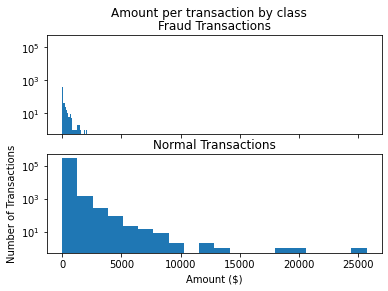

In [5]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
f.suptitle('Amount per transaction by class')
ax1.hist(df[df['Class']==1].Amount,bins=20)
ax1.set_title('Fraud Transactions')
ax2.hist(df[df['Class']==0].Amount,bins=20)
ax2.set_title('Normal Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.rcParams["figure.figsize"] = (24,6)
plt.show();

# Model Prediction

Here we will use the following algorithms to detect the outliers:
* Isolation Forest
* Local Outlier Factor

In [6]:
columnNames=list(df.columns)[:-1] #Dropping class column, as it's the target column.
contamination=len(df[df['Class']==1])/float(len(df[df['Class']==0]))

# Isolation Forest Algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

**Logic:** Isolating the Anomaly observations will be easier than the normal observations as only few features will be needed to seperate the anomaly observations. The Anomaly score increases as the number of brances increases. So the Anomaly observations will have very less anomaly score compared to others.

**Important Parameters:**
* ***n_estimators***: The number of base estimators in the ensemble.
* ***max_samples***: The number of samples to draw from X to train each base estimator.
* ***contamination***: The amount of contamination of the data set, i.e. the proportion of outliers in the data set.
* ***random_state***: Controls the pseudo-randomness of the selection of the feature and split values for each branching step and each tree in the forest.

In [7]:

cIF=IsolationForest(n_estimators=1000, max_samples="auto", contamination=contamination,random_state=19)
df['Class_IF']=cIF.fit_predict(df[columnNames].values) # Class 1: Normal Transaction, Class -1: Fraud Transaction
df['Class_IF']=abs(df['Class_IF']-1)//2                # Mapping 1 -> 0 and -1 -> 1

In [8]:
print("Accuracy (IF): ",accuracy_score(df['Class'],df['Class_IF']))
print(df.groupby(['Class_IF']).size())

Accuracy (IF):  0.9974825056968403
Class_IF
0    284314
1       493
dtype: int64


# Local Outlier Factor Algorithm

Local Outlier Factor works on the local deviation of the density of a given sample with respect to its neighbors. Here, Euclidean distance is being used to calculate the distance.

**Logic:** The Density of the Anomaly observations will be very less as compared to the normal observations.

**Important Parameters:**
* ***n_neighbors***: Number of neighbors to use by default for kneighbors queries.
* ***leaf_size***: Leaf is size passed to BallTree or KDTree. The optimal value depends on the nature of the problem.
* ***contamination***: The amount of contamination of the data set, i.e. the proportion of outliers in the data set.

In [9]:
cLOF=LocalOutlierFactor(n_neighbors=50,leaf_size=10, contamination=contamination)
df['Class_LOF']=cLOF.fit_predict(df[columnNames].values) # Class 1: Normal Transaction, Class -1: Fraud Transaction
df['Class_LOF']=abs(df['Class_LOF']-1)//2                # Mapping 1 -> 0 and -1 -> 1

In [10]:
print("Accuracy (LOF): ",accuracy_score(df['Class'],df['Class_LOF']))
print(df.groupby(['Class_LOF']).size())

Accuracy (LOF):  0.9965906736842844
Class_LOF
0    284314
1       493
dtype: int64


# Model Evaluation

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Class_IF,Class_LOF
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


In [12]:
data=[
     ["Isolation Forest",accuracy_score(df['Class'],df['Class_IF'])],
     ["Local Outlier Factor",accuracy_score(df['Class'],df['Class_LOF'])]
     ]
columns=["Algorithm","Accuracy"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒══════════════════════╤════════════╕
│ Algorithm            │   Accuracy │
╞══════════════════════╪════════════╡
│ Isolation Forest     │   0.997483 │
├──────────────────────┼────────────┤
│ Local Outlier Factor │   0.996591 │
╘══════════════════════╧════════════╛
